# White Dwarf Sensitivity Analysis

Effect of diluting the IPA fuel with water (whilst keeping the overall mass flow rate constant, and the mass flow rate of oxidiser constant).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pypropep as ppp

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 130

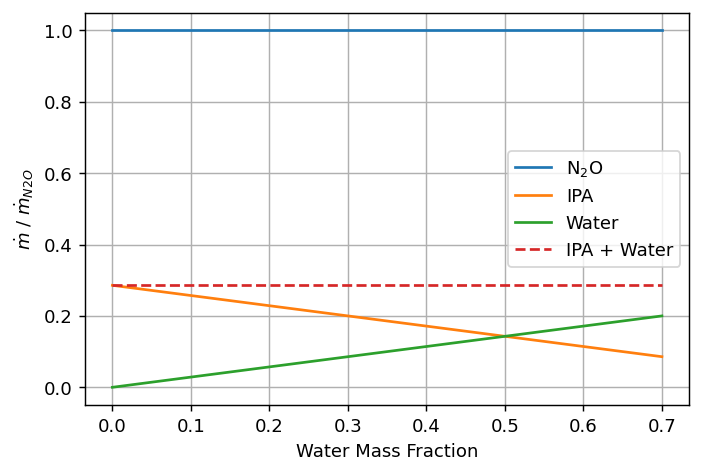

In [19]:
OF_ratio = 3.5
water_mass_fraction = np.linspace(0, 0.7, 100)

mdot_n2o = 1   # We'll only look at specific impulse, so the absolute mass flow rate doesn't matter (only the ratios)

mdot_fuel = mdot_n2o / OF_ratio                  # By "fuel" I mean the combined water and IPA
mdot_water = mdot_fuel * water_mass_fraction
mdot_ipa = mdot_fuel * (1 - water_mass_fraction)

plt.plot(water_mass_fraction, np.full(len(water_mass_fraction), mdot_n2o), label = r"N$_2$O")
plt.plot(water_mass_fraction, mdot_ipa, label = r"IPA")
plt.plot(water_mass_fraction, mdot_water, label = r"Water")
plt.plot(water_mass_fraction, mdot_water + mdot_ipa, label = r"IPA + Water", linestyle = "--")

plt.xlabel("Water Mass Fraction")
plt.ylabel(r"$\dot{m}$ / $\dot{m}_{N2O}$")
plt.grid()
plt.legend()
plt.show()

In [20]:
# Initialise
ppp.init()

# Propellant set up
ipa = ppp.PROPELLANTS['ISOPROPYL ALCOHOL']
water = ppp.PROPELLANTS['WATER']
n2o = ppp.PROPELLANTS['NITROUS OXIDE']

isp_froz = np.zeros(len(mdot_water))
isp_shift = np.zeros(len(mdot_water))

for i in range(len(mdot_water)):
    p_froz = ppp.FrozenPerformance()
    p_shift = ppp.ShiftingPerformance()

    
    p_froz.add_propellants_by_mass([(ipa, mdot_ipa[i]), (water, mdot_water[i]), (n2o, mdot_n2o)])
    p_shift.add_propellants_by_mass([(ipa, mdot_ipa[i]), (water, mdot_water[i]), (n2o, mdot_n2o)])

    # Set chamber pressure and exit pressure
    p_froz.set_state(P = 10, Pe = 1)                      
    p_shift.set_state(P = 10, Pe = 1)                      

    # Get specific impulse
    isp_froz[i] = p_froz.performance.Isp
    isp_shift[i] = p_shift.performance.Isp

Loaded 1921 thermo species
Loaded 1031 propellants


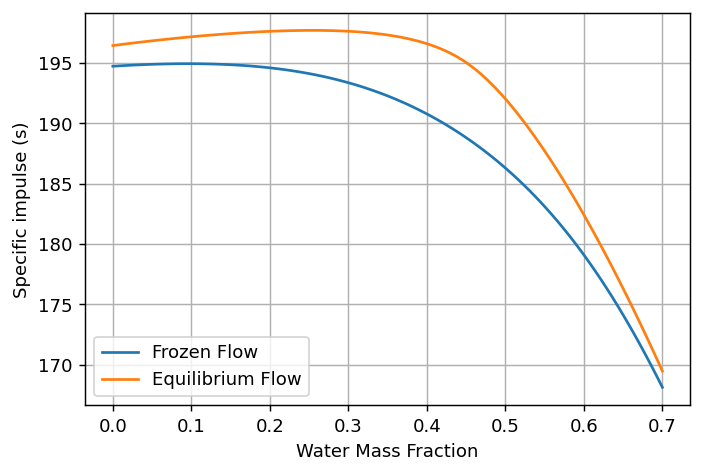

In [21]:
plt.plot(water_mass_fraction, isp_froz/9.81, label = "Frozen Flow")
plt.plot(water_mass_fraction, isp_shift/9.81, label = r"Equilibrium Flow")

plt.xlabel("Water Mass Fraction")
plt.ylabel("Specific impulse (s)")
plt.grid()
plt.legend()
plt.show()